In [1]:
!pip install langgraph langsmith

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.0/118.0 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 408.7/408.7 kB 16.3 MB/s eta 0:00:00
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.3.13
    Uninstalling langchain-core-0.3.13:
      Successfully uninstalled langchain-core-0.3.13


In [2]:
!pip install langchain langchain_groq langchain_community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 26.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 39.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.5/106.5 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 2.8 MB/s eta 0:00:00
  Attempting uninstall: langchain
    Found existing installation: langchain 0.3.4
    Uninstalling langchain-0.3.4:
      Successfully uninstalled langchain-0.3.4


In [7]:
from google.colab import userdata
groq = userdata.get('Groq_Langgraph')
langsmith = userdata.get('Langsmith')

In [9]:
import os
os.environ["LANGCHAIN_API_KEY"] = langsmith
os.environ["LANGCHAIN_TRACING_V2"]="true"
os.environ["LANGCHAIN_PROJECT"]="Langgraph"

In [10]:
from langchain_groq import ChatGroq
llm = ChatGroq(groq_api_key=groq, model_name="llama-3.1-70b-versatile")
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x7e8555dee6b0>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x7e8555dec820>, model_name='llama-3.1-70b-versatile', model_kwargs={}, groq_api_key=SecretStr('**********'))

In [11]:
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph,START,END #State management, Start node, End node
from langgraph.graph.message import add_messages


In [12]:
class State(TypedDict):
    messages:Annotated[list,add_messages]

graph_builder=StateGraph(State)

In [13]:
graph_builder

In [14]:
def chatbot(state:State):
  return {"messages": llm.invoke(state['messages'])}

In [15]:
graph_builder.add_node("chatbot",chatbot)

In [16]:
graph_builder

In [17]:
graph_builder.add_edge(START,"chatbot")
graph_builder.add_edge("chatbot",END)

In [19]:
graph = graph_builder.compile()

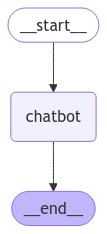

In [20]:
from IPython.display import Image, display
try:
  display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
  pass

In [ ]:
while True:
  user_input=input("User: ")
  if "quit" in user_input.lower():
    print("Good Bye")
    break
  for event in graph.stream({'messages':("user",user_input)}):
    for value in event.values():
      print("Assistant:",value["messages"].content)

User: What's the tallest building on moon
Assistant: There are no buildings on the moon.  While humans did land on the moon as part of NASA's Apollo missions in the late 1960s and early 1970s, no structures or buildings have been permanently established on its surface.
User: how about earth
Assistant: Earth is our home planet and the third planet from the Sun in our solar system. Here are some interesting facts about Earth:

1. **Unique in the Universe**: Earth is the only known planet in the universe that supports life. Its atmosphere, magnetic field, and distance from the Sun create a perfect environment for life to thrive.

2. **Composition**: Earth is composed of iron (32.1%), oxygen (30.1%), silicon (15.1%), magnesium (14%), and other elements.

3. **Water Coverage**: About 71% of Earth's surface is covered with water, including oceans, lakes, rivers, and underground aquifers.

4. **Atmosphere**: Earth's atmosphere is made up of 78% nitrogen, 21% oxygen, and 1% other gases, includ